# ■ 오차 역전파

수치미분이 너무 느려서 오차 역전파법이라는 것을 설명하는데 오차 역전파법을  
쉽게 설명하기 위해 그림으로 설명하는 계산그래프 그림을 이용해서 오차 역전파법을  
설명하고 있다. (스탠포드 대학교에서 딥러닝 수업할때 사용한 방법)

# ■ 계산 그래프

    순전파와 역전파에 계산과정을 그래프로 나타내는 방법

계산 그래프의 장점이 무엇인가 ?  " 국소적 계산을 할 수 있다. "

국소적 계산이란 ? 전체에서 어떤일이 벌어지든 상관없이 자신과 관련된 정보만으로 원하는 결과를 얻어낼 수 있는 계산방식

<div>
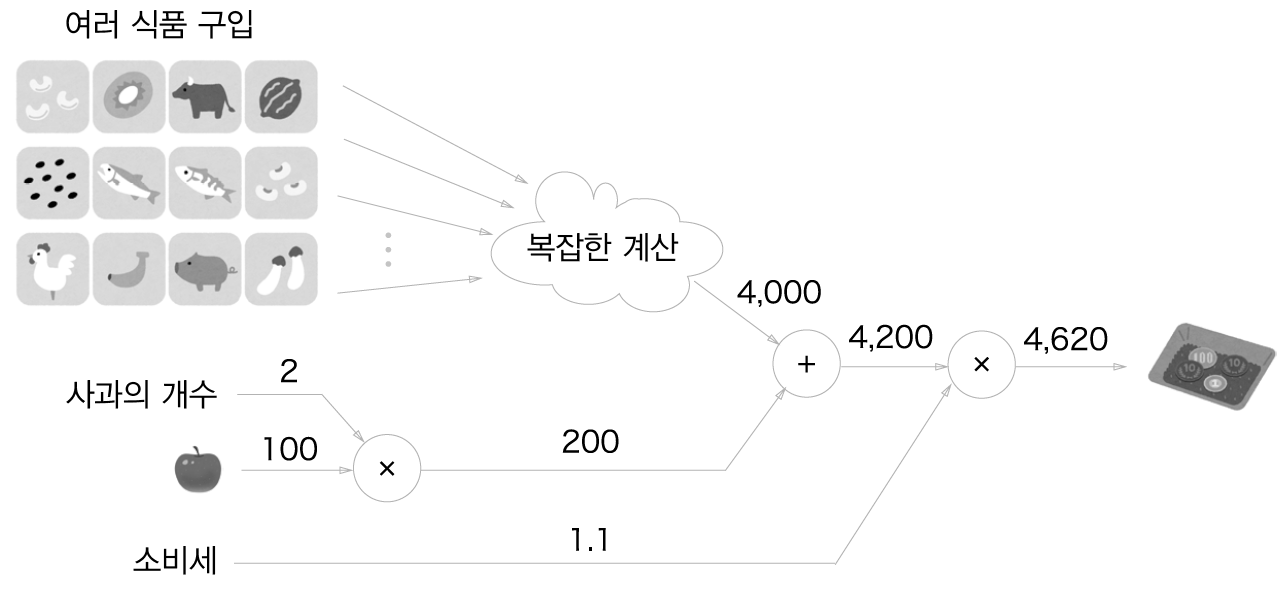
</div>

# ■ 왜 계산 그래프로 문제를 해결하는가 ?

전체가 아무리 복잡해도 각 노드에서 단순한 계산에 집중하여 문제를 단순화 시킬 수 있다.  

큰 문제를 해결하는 방법이 큰 문제는 작은 문제들이 여러 개 묶여있는 것이므로  
작은 문제들을 하나씩 해결하면서 큰 문제를 해결하는 방법 (다이나믹 프로그래밍)  

    입력값  ------>  활성화 함수 ------>  출력층 함수  ------> 오차 함수
                           ↓                  ↓                 ↓
                    시그모이드함수        소프트맥스 함수     교차엔트로피 함수 => 분류
                       렐루 함수             항등함수            평균제곱오차   => 회귀

최종적으로 산출하고자 하는 것은 ?  오차가 가장 적은 가중치  

'가중치(w1)' 에 변화가 생겼을때 '오차'는 얼마나 달라지는지 ?  
				
'사과값'이 아주 조금 올랐을때 '지불금액' 이 얼마나 증가하는지 알고싶다면 ?

       ∂ 지불금액
    -----------------
        ∂ 사과값

지불금액을 사과값으로 편미분하면 알 수 있습니다.  
계산 그래프의 역전파를 이용하면 위의 계산을 할 수 있습니다.

## 예제1. 현빈군은 슈퍼에서 1개의 100원인 사과를 2개 샀습니다. 이때 지불금액을 구하시오. 단 소비세가 10% 부과됩니다.

<div>
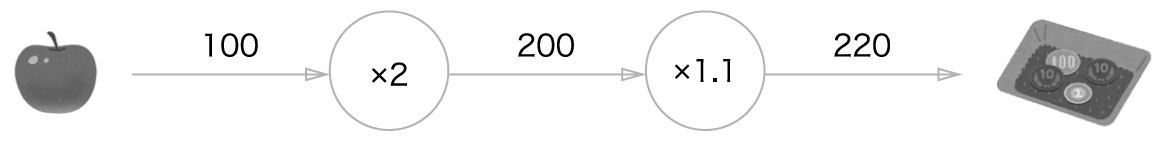
</div>

## 예제2. 현빈군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤을 1개에 150원 입니다. 소비세가 10% 일때 지불금액을 구하세요

<div>
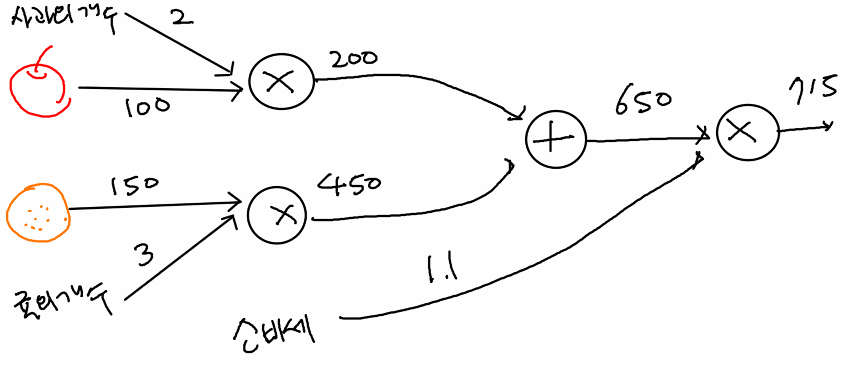
</div>

# ■ 덧셈 노드의 순전파와 역전파

z = x + y

                                               순전파                             역전파

<div>
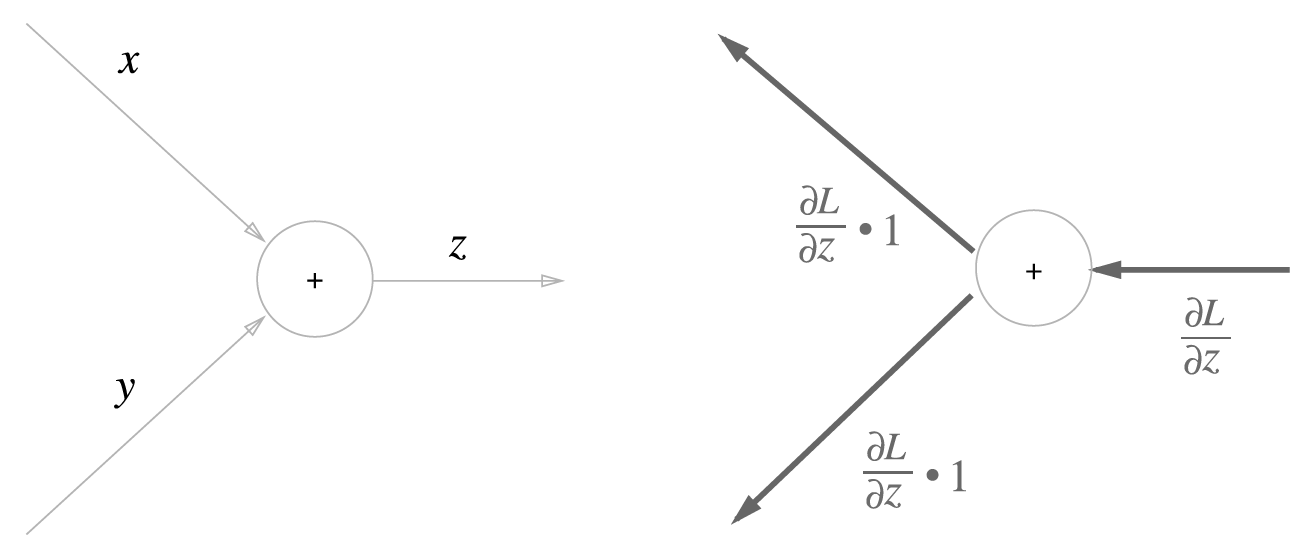
</div>

설명: 덧셈노드의 역전파는 상류에서 흘러왔던 값이 그대로 흘러갑니다.

## 문제91. 아래의 덧셈노드 그래프의 순전파 값과 역파 값을 적으시오 !

<div>
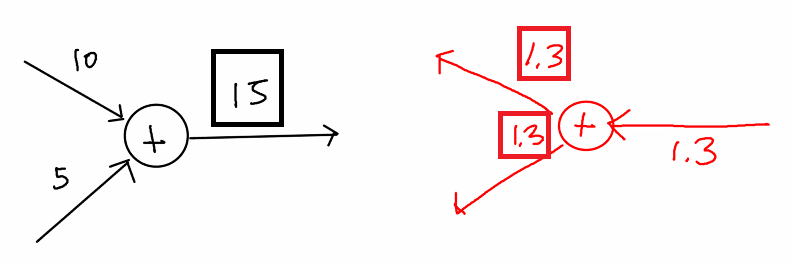
</div>

# ■ 곱셈 노드의 순전파와 역전파

z = xy

                                               순전파                             역전파

<div>
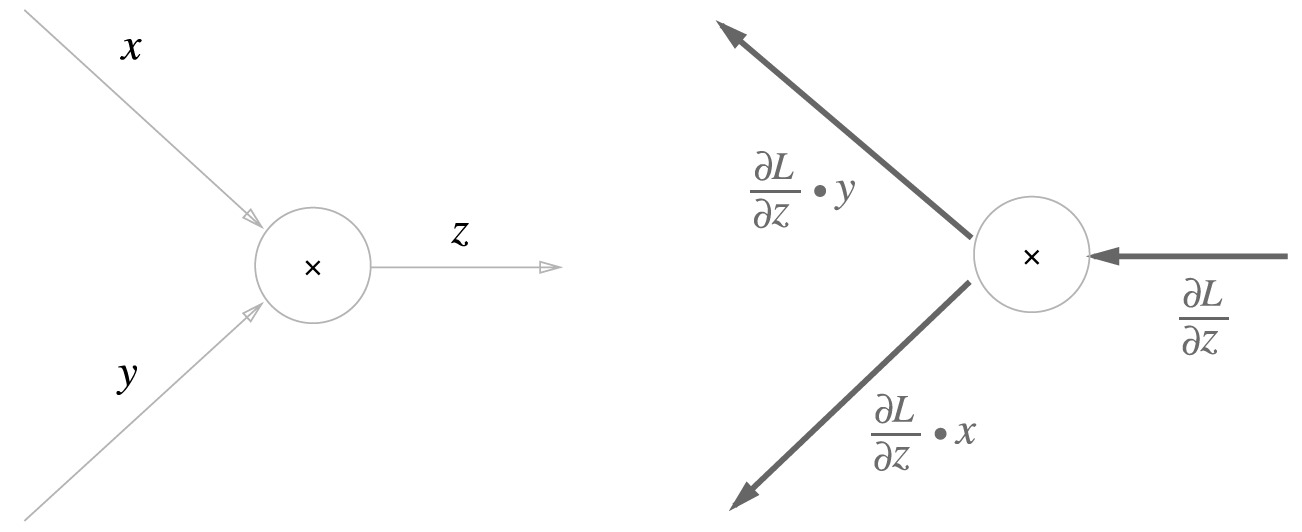
</div>

설명: 곱셈노드의 역전파는 상휴의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보냅니다.

## 문제92. 아래의 곱셈 노드의 순전파 값과 역전파 값을 각각 적으시오

<div>
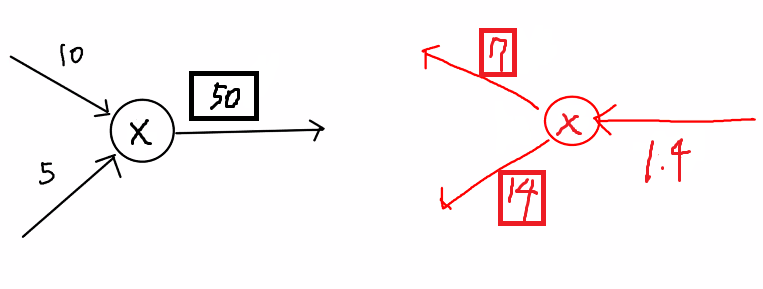
</div>

# ■ 곱셉, 덧셈 계층 구현

## 문제93. 곱셈계층을 파이썬으로 구현하시오 !

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self,x,y):  # 순전파
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):   # 역전파
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

## 문제94. 위에서 만든 곱셈 클래스를 객체화 시켜서 아래의 사과가격을 구하시오 !

    apple = 100
    apple_num = 2

In [3]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self,x,y):  # 순전파
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):   # 역전파
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy
    
apple = 100
apple_num = 2

mul_apple_layer = MulLayer()
apple_price = mul_apple_layer.forward(apple, apple_num)
print(apple_price)

200


## 문제95. 곱셈계층 클래스를 객체화 시켜서 아래의 그림을 계산하시오 !

<div>
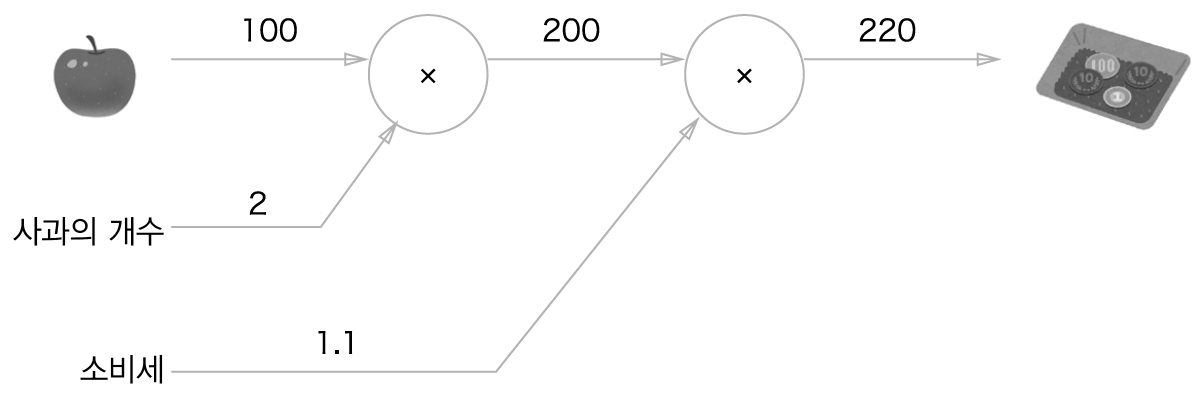
</div>

In [4]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self,x,y):  # 순전파
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):   # 역전파
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy
    
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

220.00000000000003


## 문제96. 덧셈계층 클래스를 파이썬으로 구현하시오 ! 

In [6]:
class AddLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self,x,y):  # 순전파
        self.x = x
        self.y = y
        out = x + y
        return out
    
    def backward(self, dout):   # 역전파
        dx = dout
        dy = dout
        return dx, dy

## 문제97. 위에서 만든 곱셈 클래스와 덧셈 클래스를 이용해서 아래의 그림의 계산 그래프를 구현하고 최종 값을 계산하시오 !

<div>
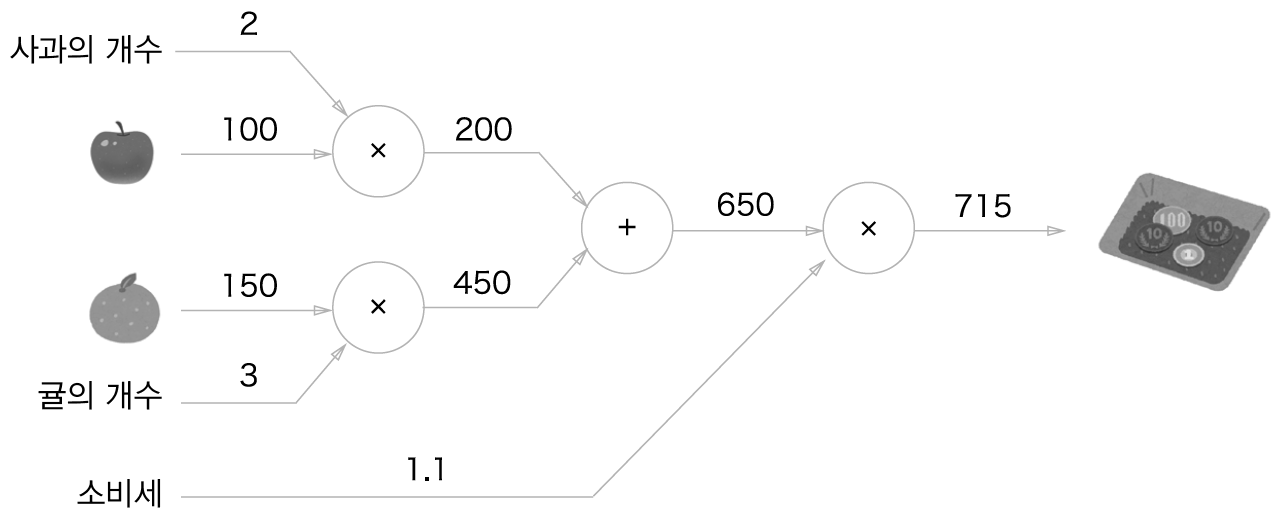
</div>

In [10]:
apple = 100
apple_num = 2
tang = 150
tang_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tang_layer = MulLayer()
add_apple_tang_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
tang_price = mul_tang_layer.forward(tang, tang_num)
add_price = add_apple_tang_layer.forward(apple_price, tang_price)
price = mul_tax_layer.forward(add_price, tax)

print(apple_price)
print(tang_price)
print(add_price)
print(price)

200
450
650
715.0000000000001


# ■ 활성화 함수 계층 구현하기

    계산 그래프
		 - 덧셈 그래프
		 - 곱셈 그래프
		 - 렐루 함수 그래프
		 - 시그모이드 함수 그래프
		 - 교차엔트로피 함수 그래프(부록)
		 - 소프트맥스 함수 그래프(부록)

계산 그래프를 보면서 순전파, 역전파 함수를 생성

# ■ 렐루 함수를 위한 계산 그래프

0 보다 큰 값이 입력이 되면 그 값을 그대로 출력하고  
0 이거나 0 보다 작은 값이 입력이 되면 0 을 출력하는 함수

<div>
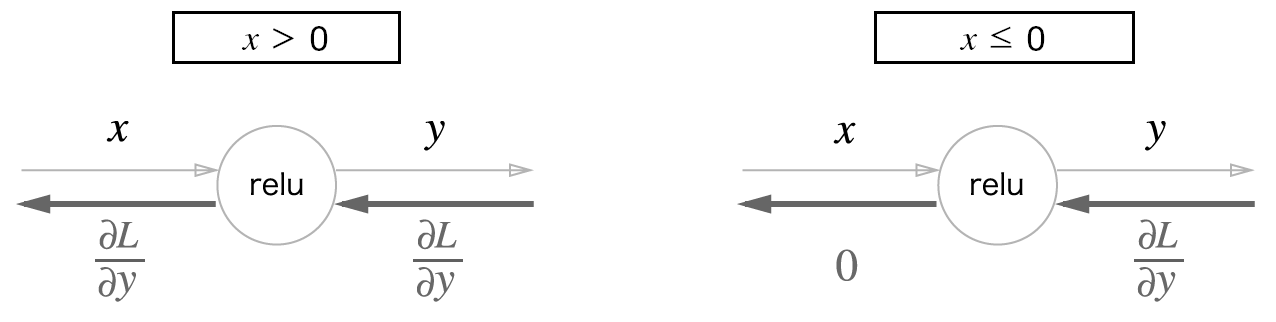
</div>

<div>
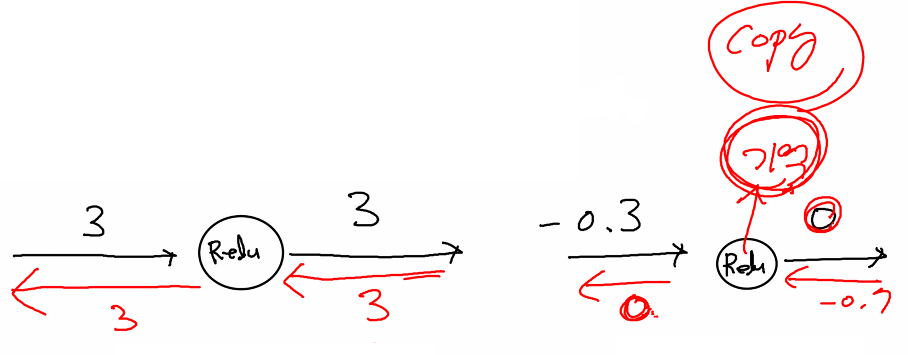
</div>

렐루함수를 구현하려면 알아야 하는 문법 2가지

    1. copy 모듈 사용법
    2. x[x <= 0] 의 의미

# ■ 1. copy 모듈 사용법

In [11]:
a = [1,2,3]
b = a     # b 는 a 와 같은 곳을 바로 보게 된다.
print(b)
a[1] = 6
print(a)
print(b)

[1, 2, 3]
[1, 6, 3]
[1, 6, 3]


지금 b 는  a 와 같은 곳을 바라보고 있는 것인데 이렇게 하지 않고  
새롭게 b 를 위한 [1, 2, 3] 을 만들고 싶다면 copy 를 이용해야합니다.

In [12]:
from copy import copy

a = [1,2,3]
b = copy(a)   # copy 를 했기 때문에 b 는 별도의 객체가 됩니다.
print(a)
print(b)
a[1] = 6
print(a)
print(b)

[1, 2, 3]
[1, 2, 3]
[1, 6, 3]
[1, 2, 3]


# ■ 2. x[x <= 0] 의 의미(렐루는 순전파때 보냈던 신호를 기억하고 있어야 하기 때문에 필요 그 자리에 신호가 보내졌었는가를 기억해야한다.)

In [13]:
import numpy as np

x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x<=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [14]:
from copy import copy

out = x.copy()
out[mask] = 0
print(out)

[[1. 0.]
 [0. 3.]]


## 문제98. Relu 클래스를 생성하시오 !

In [15]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

In [16]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
relu = Relu()
print(relu.forward(x))
dout = np.array([[2.0, 3.0], [-3.0, -4.0]])
print(relu.backward(dout))

[[1. 0.]
 [0. 3.]]
[[ 2.  0.]
 [ 0. -4.]]
